# Image Segmentation
Also known as semantic segmentation, parts of an image that belong to the same object class are put into the same cluster

In [40]:
# Importing necessary libraries
from skimage import data
from skimage import filters
from skimage import io
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

## Supervised Segmentation
It requires external input. This includes things like setting a threshold, converting formats, and correcting external biases.

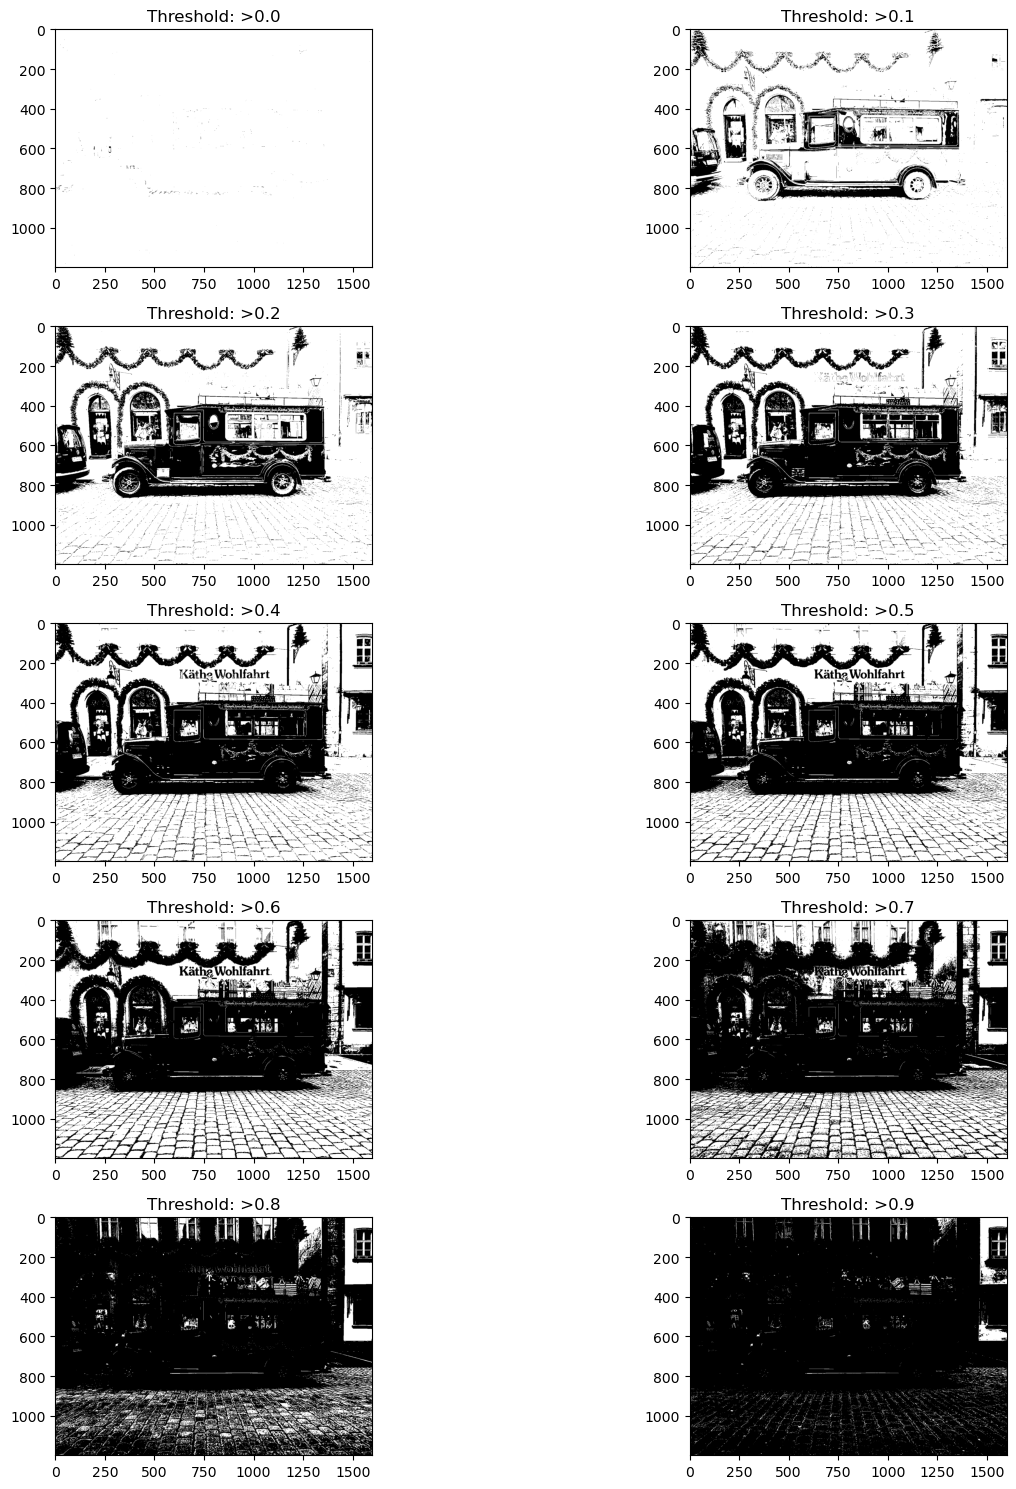

In [41]:
image = io.imread("rothenburg.jpeg")
gray_image = rgb2gray(image)

plt.figure(figsize=(15, 15))

for i in range(10):
   
  # Iterating different thresholds
  binarized_gray = (gray_image > i*0.1)*1
  plt.subplot(5,2,i+1)
   
  # Rounding of the threshold
  # value to 1 decimal point
  plt.title("Threshold: >"+str(round(i*0.1,1)))
   
  # Displaying the binarized image
  # of various thresholds
  plt.imshow(binarized_gray, cmap = 'gray')
   
plt.tight_layout()

## Unsupervised Segmentation
This technique produces an image with highlighted borders between labeled areas, where the pictures were segmented using the SLIC (Simple linear iterative clustering) method.

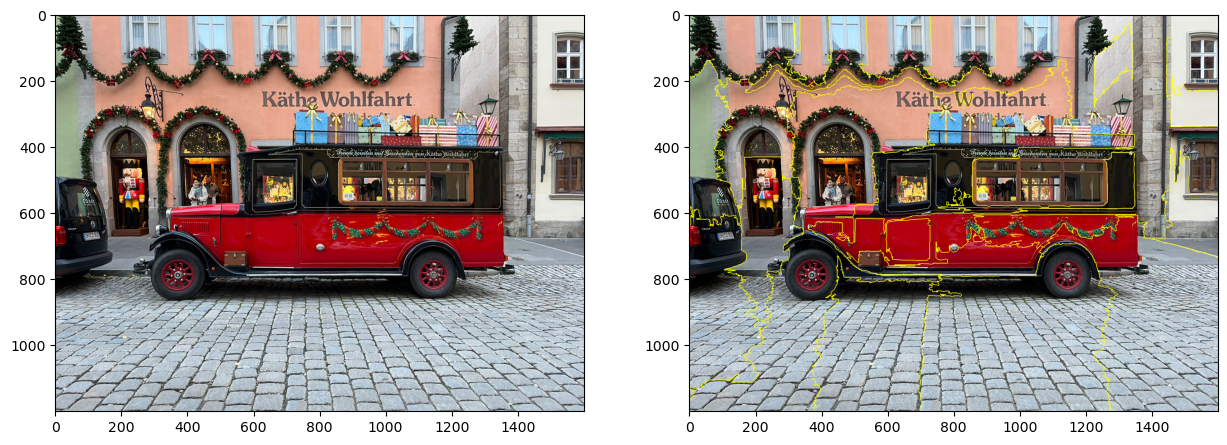

In [45]:
from skimage.segmentation import slic, mark_boundaries
 
plt.figure(figsize=(15, 15))
 
rothenburg_segments = slic(image,
                          n_segments=100,
                          compactness=1)
 
plt.subplot(1, 2, 1)
 
# Plotting the original image
plt.imshow(image)
 
plt.subplot(1, 2, 2)
 
plt.imshow(mark_boundaries(image, rothenburg_segments))

## Simple Linear Iterative Clustering (SLIC)
By combining pixels in the image plane based on their color similarity and proximity, this method generates superpixels.

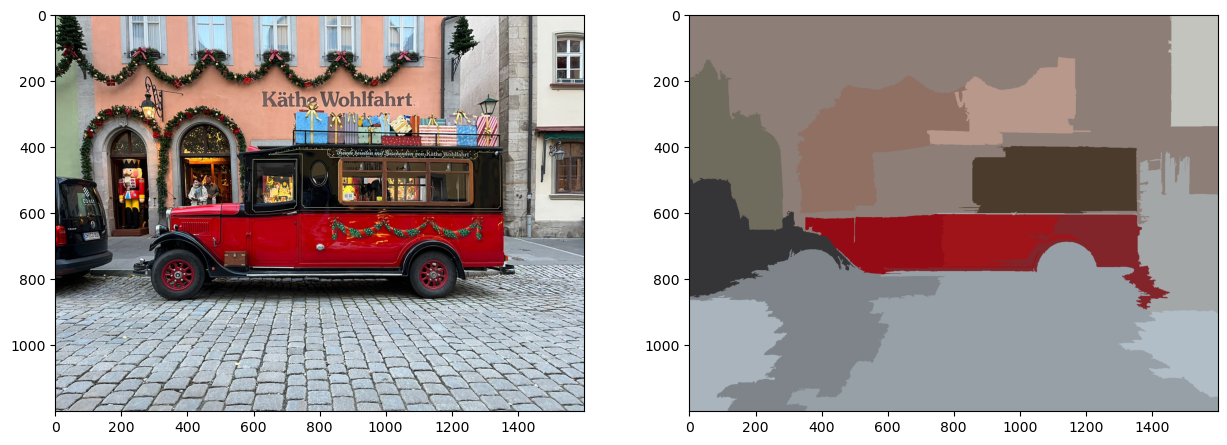

In [46]:
from skimage.segmentation import slic
from skimage.color import label2rgb

plt.figure(figsize=(15,15))

rothenburg_segments = slic(image,
                          n_segments=50,
                          compactness=10)
plt.subplot(1,2,1)
 
# Plotting the original image
plt.imshow(image)
plt.subplot(1,2,2)
 
# Converts a label image into
# an RGB color image for visualizing
# the labeled regions. 
plt.imshow(label2rgb(rothenburg_segments,
                     image,
                     kind = 'avg'))